In [61]:
#Importing libraries
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("sensor data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz")

In [21]:
data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [4]:
data.columns

Index(['timestamp', 'raw_acc:magnitude_stats:mean',
       'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       ...
       'label:STAIRS_-_GOING_DOWN', 'label:ELEVATOR', 'label:OR_standing',
       'label:AT_SCHOOL', 'label:PHONE_IN_HAND', 'label:PHONE_IN_BAG',
       'label:PHONE_ON_TABLE', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS',
       'label_source'],
      dtype='object', length=278)

In [152]:
# Combining all the dataframe
user_list = []

for file in os.listdir('sensor data/'):
    
    df = pd.read_csv('sensor data/'+ file)
    df['UUID'] = file.split('.')[0]
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    user_list.append(df)
    
sensor_data = pd.concat(user_list)
sensor_data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [97]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377346 entries, 0 to 4972
Columns: 279 entries, UUID to label_source
dtypes: float64(276), int64(2), object(1)
memory usage: 806.1+ MB


In [98]:
sensor_data.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [99]:
sensor_data.isna().sum()

UUID                                                                            0
timestamp                                                                       0
raw_acc:magnitude_stats:mean                                                  290
raw_acc:magnitude_stats:std                                                   290
raw_acc:magnitude_stats:moment3                                               290
raw_acc:magnitude_stats:moment4                                               290
raw_acc:magnitude_stats:percentile25                                          290
raw_acc:magnitude_stats:percentile50                                          290
raw_acc:magnitude_stats:percentile75                                          290
raw_acc:magnitude_stats:value_entropy                                         290
raw_acc:magnitude_stats:time_entropy                                          290
raw_acc:magnitude_spectrum:log_energy_band0                                   290
raw_acc:magnitud

Except for some few columns, most of the columns contain null values


In [100]:
sensor_data.groupby(['UUID']).count()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [153]:
sensor_data.shape

(377346, 279)

Showing all columns in the dataset

In [102]:

print("Number of columns in the database =", sensor_data.columns.size)
for column in sensor_data.columns:
    print (column)

Number of columns in the database = 279
UUID
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4


In [103]:
sensor_data.dtypes

UUID                                                                        object
timestamp                                                                    int64
raw_acc:magnitude_stats:mean                                               float64
raw_acc:magnitude_stats:std                                                float64
raw_acc:magnitude_stats:moment3                                            float64
raw_acc:magnitude_stats:moment4                                            float64
raw_acc:magnitude_stats:percentile25                                       float64
raw_acc:magnitude_stats:percentile50                                       float64
raw_acc:magnitude_stats:percentile75                                       float64
raw_acc:magnitude_stats:value_entropy                                      float64
raw_acc:magnitude_stats:time_entropy                                       float64
raw_acc:magnitude_spectrum:log_energy_band0                                float64
raw_

In [104]:
features = sensor_data.iloc[:,2:227]
features.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch

Extracting all features in the dataset

In [105]:
features.shape

(377346, 225)

In [110]:
labels = sensor_data.iloc[:, 228:]
labels.head()

,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2


Extracting all labels in the dataset

In [111]:
label_count = labels.count()
label_count

label:SITTING                    306594
label:FIX_walking                306594
label:FIX_running                140870
label:BICYCLING                  135183
label:SLEEPING                   285268
label:LAB_WORK                    49395
label:IN_CLASS                   109063
label:IN_A_MEETING               231213
label:LOC_main_workplace         201727
label:OR_indoors                 196806
label:OR_outside                 151498
label:IN_A_CAR                   174696
label:ON_A_BUS                   169032
label:DRIVE_-_I_M_THE_DRIVER     162264
label:DRIVE_-_I_M_A_PASSENGER    131087
label:LOC_home                   355334
label:FIX_restaurant             157582
label:PHONE_IN_POCKET            134364
label:OR_exercise                240837
label:COOKING                    209346
label:SHOPPING                   138793
label:STROLLING                   53761
label:DRINKING__ALCOHOL_          70783
label:BATHING_-_SHOWER           201120
label:CLEANING                   159420


In [112]:
# Checking which label source had the highest count of examples
label_source = labels['label_source'].value_counts(normalize=True).reset_index()
label_source = label_source.rename(columns={'index':'label_source', 'label_source':'percentage'})
label_source

,label_source,percentage
0,2,0.697185
1,-1,0.182925
2,1,0.061784
3,6,0.028942
4,4,0.018540
5,5,0.008584
6,0,0.001606
7,3,0.000435


A single source represent almost 70 percent of the data source

In [115]:
for col in labels.columns:
    print(labels[col].value_counts(dropna=False, normalize=True), '\n\n')

0.0    0.451146
1.0    0.361355
NaN    0.187499
Name: label:SITTING, dtype: float64 


0.0    0.753839
NaN    0.187499
1.0    0.058662
Name: label:FIX_walking, dtype: float64 


NaN    0.626682
0.0    0.370429
1.0    0.002889
Name: label:FIX_running, dtype: float64 


NaN    0.641753
0.0    0.344943
1.0    0.013303
Name: label:BICYCLING, dtype: float64 


0.0    0.535882
NaN    0.244015
1.0    0.220103
Name: label:SLEEPING, dtype: float64 


NaN    0.869099
0.0    0.120704
1.0    0.010198
Name: label:LAB_WORK, dtype: float64 


NaN    0.710973
0.0    0.272834
1.0    0.016192
Name: label:IN_CLASS, dtype: float64 


0.0    0.599079
NaN    0.387265
1.0    0.013656
Name: label:IN_A_MEETING, dtype: float64 


NaN    0.465406
0.0    0.444640
1.0    0.089955
Name: label:LOC_main_workplace, dtype: float64 


1.0    0.489450
NaN    0.478447
0.0    0.032103
Name: label:OR_indoors, dtype: float64 


NaN    0.598517
0.0    0.369380
1.0    0.032103
Name: label:OR_outside, dtype: float64 


NaN    0

This is to check which labels have a lot of relevant examples.

label:SITTING <br>
label:LOC<br>
label:PHONE_ON_TABLE<br>
label:LOC_home<br>
label:LYING DOWN<br>
label:OR_indoors<br>
label:SLEEPING<br>

These labels have higher relevant examples

In [154]:
# Getting the label:LYING_DOWN
ld_data = sensor_data.iloc[:, :227]
ld_data['label:LYING_DOWN'] = sensor_data.iloc[:, 227]


In [155]:
ld_data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [156]:
# Dropping all null values in the label:LYING_DOWN column
ld_data = ld_data.dropna(subset=['label:LYING_DOWN'])
ld_data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [157]:

mean_values = {}
for col in ld_data.iloc[:, 1:-1].columns:
    mean_values[col] = ld_data[col].mean()
    
ld_data = ld_data.fillna(value=mean_values)

The null values are filled with the mean of their respective columns

In [120]:
# checking for missing values
ld_data.isnull().any().sum()

0

In [158]:
# Checking the correlation between features and label
correlation_matrix = ld_data.corr()
correlation_df = correlation_matrix['label:LYING_DOWN'].sort_values(ascending=False).reset_index()
correlation_df = correlation_df.rename(columns={'index':'features', 'label:LYING_DOWN':'correlation'})
correlation_df

C:\Users\ErnestZottor\AppData\Local\Temp\ipykernel_12320\96624102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ld_data.corr()


,features,correlation
0,label:LYING_DOWN,1.000000
1,discrete:time_of_day:between0and6,0.629165
2,discrete:time_of_day:between3and9,0.458558
3,discrete:battery_state:is_full,0.446425
4,discrete:time_of_day:between21and3,0.365044
5,raw_acc:magnitude_stats:value_entropy,0.310583
6,lf_measurements:battery_level,0.285405
7,watch_acceleration:relative_directions:avr_cos...,0.251036
8,watch_acceleration:relative_directions:avr_cos...,0.246227
9,watch_acceleration:relative_directions:avr_cos...,0.244930


In [123]:
# ld_data.drop(['discrete:battery_plugged:is_wireless', 'discrete:battery_state:is_unknown',
#                      'discrete:wifi_status:is_reachable_via_wwan', 'lf_measurements:proximity'], axis=1, inplace=True)

In [162]:
# splitting data into features and labels
features = ld_data.iloc[:, 2:-1]
label = ld_data[['label:LYING_DOWN']]

In [ ]:
# train_label = train_label.to_numpy()
# test_label = test_label.to_numpy()

In [163]:
train_set, test_set, train_label, test_label = train_test_split(features, label, test_size=0.1, 
                                                                random_state=0, stratify=label)

In [164]:
train_set.shape, train_label.shape

((273350, 225), (273350, 1))

In [ ]:
# # Standizing features
# scaler = StandardScaler()
# train_set = scaler.fit_transform(train_set)
# test_set = scaler.transform(test_set)

# # changing datatype from float64 to float32
# train_set = train_set.astype('float32')
# test_set = test_set.astype('float32')

In [165]:

# Correlation between context labels for all user
corr = labels.corr().sort_values(by=list(labels.columns), ascending=False)
corr.dropna(how="all")

,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
label:SITTING,1.000000,-0.249660,-0.079839,-0.161362,-0.537308,0.132310,0.237669,0.131182,0.259970,0.060270,-0.076760,0.193104,0.094544,0.238699,0.155973,-0.248191,0.092567,-0.047077,-0.158739,-0.105006,-0.085198,-0.106481,-0.006818,-0.089658,-0.117829,-0.048932,-0.081446,0.185706,0.242800,-0.114290,0.144797,0.063596,0.005779,0.112048,0.422546,0.200406,0.008665,-0.086969,-0.081601,-0.140899,-0.081084,-0.077657,-0.052734,-0.335527,0.265191,-0.004895,0.042734,0.025191,0.126642,0.100324,0.091792
label:COMPUTER_WORK,0.422546,-0.118176,-0.031327,-0.084258,-0.280666,0.110926,-0.028908,-0.036587,0.512390,0.067233,-0.082363,-0.081958,-0.046723,-0.099300,-0.053032,-0.150383,-0.051244,-0.082953,-0.079177,-0.049678,-0.042672,-0.076425,-0.056612,-0.036760,-0.060390,-0.036422,-0.038663,-0.065889,0.235968,-0.069654,-0.059455,-0.026820,-0.036189,-0.056953,1.000000,-0.038966,-0.039694,-0.055251,-0.044848,-0.074454,-0.031381,-0.034235,-0.023460,-0.090563,0.252223,-0.139630,-0.092537,0.186745,0.153174,-0.104147,0.035089
label:AT_SCHOOL,0.265191,0.063083,-0.006957,-0.033065,-0.251799,0.525256,0.294755,0.157927,0.368806,-0.081080,0.078777,-0.069134,-0.032595,-0.082753,-0.042637,-0.381526,-0.031120,0.213503,0.009764,-0.053325,-0.041487,0.006524,-0.070057,-0.047149,-0.035735,-0.028203,-0.034200,-0.095301,0.009063,-0.060023,-0.079205,0.003729,-0.023292,0.131672,0.252223,-0.002743,-0.029441,-0.049776,-0.042144,0.016873,0.070142,0.076537,0.066584,-0.003134,1.000000,-0.015602,0.042693,-0.140694,0.209758,0.044777,0.032940
label:LOC_main_workplace,0.259970,-0.052590,-0.033671,-0.082921,-0.288053,0.445869,-0.052464,0.152058,1.000000,0.022321,-0.027329,-0.094948,-0.046828,-0.120193,-0.065074,-0.332207,-0.058171,0.036221,-0.072302,-0.062288,-0.044621,-0.048902,-0.053258,-0.043520,0.047151,-0.038932,-0.042422,-0.097154,0.151890,-0.053748,-0.091991,-0.044250,0.082843,0.018169,0.512390,-0.027237,-0.012108,-0.059672,-0.048524,-0.062391,-0.029750,-0.029578,-0.005424,0.123914,0.368806,-0.084129,-0.173629,0.094415,0.316444,0.002392,0.102340
label:SURFING_THE_INTERNET,0.242800,-0.070636,-0.030532,-0.062768,-0.198077,-0.058225,-0.075514,-0.002116,0.151890,0.054229,-0.062415,-0.057807,-0.027957,-0.031075,-0.036837,0.069931,-0.025284,-0.161077,-0.068181,-0.029889,-0.036128,-0.055302,-0.043995,-0.032541,-0.049616,-0.023866,-0.004901,0.017534,1.000000,-0.068811,-0.027380,0.149994,0.148270,0.073238,0.235968,0.075149,-0.019262,-0.039799,-0.036432,-0.047111,0.076008,0.064531,-0.021117,-0.074558,0.009063,0.033121,-0.107970,0.113817,-0.057718,0.014028,0.001093
label:DRIVE_-_I_M_THE_DRIVER,0.238699,-0.055321,-0.016364,-0.045129,-0.153607,-0.054224,-0.042697,-0.033617,-0.120193,-0.324308,0.329596,0.833624,-0.021247,1.000000,-0.006677,-0.201784,-0.028837,0.006428,-0.049595,-0.017924,0.052274,0.237555,-0.031330,-0.019871,-0.029989,-0.018724,-0.016284,-0.061747,-0.031075,-0.033435,-0.030939,0.019294,-0.020326,-0.010221,-0.099300,-0.015716,-0.022112,-0.025841,-0.022529,-0.039111,-0.015902,-0.015245,-0.009991,-0.058591,-0.082753,0.001488,0.450337,-0.174306,-0.025667,0.

In [166]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [167]:
# changing datatype from float64 to float32
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')

In [31]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from functools import partial
import keras
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [ ]:
# model = Sequential([
#     Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
#     BatchNormalization(),
#     Dense(32, activation='elu', kernel_initializer='he_normal'),
#     BatchNormalization(),
#     Dense(1, activation='sigmoid')]
# )

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [195]:
# knn_model= KNeighborsClassifier(n_neighbors=1)
# knn_model.fit(train_set,train_label)

In [140]:
y_pred= knn_model.predict(test_set)

In [142]:
# print(classification_report(train_label,y_pred))

In [ ]:
# train_set, test_set, train_label, test_label

In [168]:
model = Sequential([
    Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(32, activation='elu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')]
)

In [169]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                14464     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,961
Trainable params: 16,769
Non-trai

In [170]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', 
              metrics=['binary_accuracy'])

# Setting up early stopping:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Setting Learning Rate Scheduler:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)

In [171]:
history = model.fit(train_set, 
                    train_label,
                    batch_size=32,
                    epochs=50, 
                    verbose=1, 
                    validation_split=0.1, 
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/50
7688/7688 [==============================] - 21s 3ms/step - loss: 0.2052 - binary_accuracy: 0.9212 - val_loss: 0.1589 - val_binary_accuracy: 0.9404 - lr: 0.0010
Epoch 2/50
7688/7688 [==============================] - 19s 2ms/step - loss: 0.1585 - binary_accuracy: 0.9407 - val_loss: 0.1359 - val_binary_accuracy: 0.9500 - lr: 0.0010
Epoch 3/50
7688/7688 [==============================] - 26s 3ms/step - loss: 0.1389 - binary_accuracy: 0.9485 - val_loss: 0.1210 - val_binary_accuracy: 0.9559 - lr: 0.0010
Epoch 4/50
7688/7688 [==============================] - 25s 3ms/step - loss: 0.1274 - binary_accuracy: 0.9533 - val_loss: 0.1147 - val_binary_accuracy: 0.9587 - lr: 0.0010
Epoch 5/50
7688/7688 [==============================] - 27s 3ms/step - loss: 0.1198 - binary_accuracy: 0.9563 - val_loss: 0.1155 - val_binary_accuracy: 0.9590 - lr: 0.0010
Epoch 6/50
7688/7688 [==============================] - 26s 3ms/step - loss: 0.1137 - binary_accuracy: 0.9580 - val_loss: 0.1062 - val_binar

Epoch 48/50
7688/7688 [==============================] - 27s 3ms/step - loss: 0.0575 - binary_accuracy: 0.9788 - val_loss: 0.0790 - val_binary_accuracy: 0.9741 - lr: 1.2500e-04
Epoch 49/50
7688/7688 [==============================] - 27s 3ms/step - loss: 0.0565 - binary_accuracy: 0.9794 - val_loss: 0.0781 - val_binary_accuracy: 0.9742 - lr: 1.2500e-04
Epoch 50/50
7688/7688 [==============================] - 28s 4ms/step - loss: 0.0564 - binary_accuracy: 0.9791 - val_loss: 0.0782 - val_binary_accuracy: 0.9742 - lr: 1.2500e-04


In [172]:
model.evaluate(test_set, test_label)

950/950 [==============================] - 2s 2ms/step - loss: 0.0748 - binary_accuracy: 0.9760


[0.07475470006465912, 0.9759984016418457]

In [173]:
y_pred = model.predict(test_set, verbose=1)

950/950 [==============================] - 1s 1ms/step


In [174]:
pred = []
for i in range(len(test_set)):
    if y_pred[i][0] >= 0.5:
      pred.append(1)
    else:
      pred.append(0)

In [175]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     19952
         1.0       0.97      0.96      0.96     10421

    accuracy                           0.98     30373
   macro avg       0.97      0.97      0.97     30373
weighted avg       0.98      0.98      0.98     30373



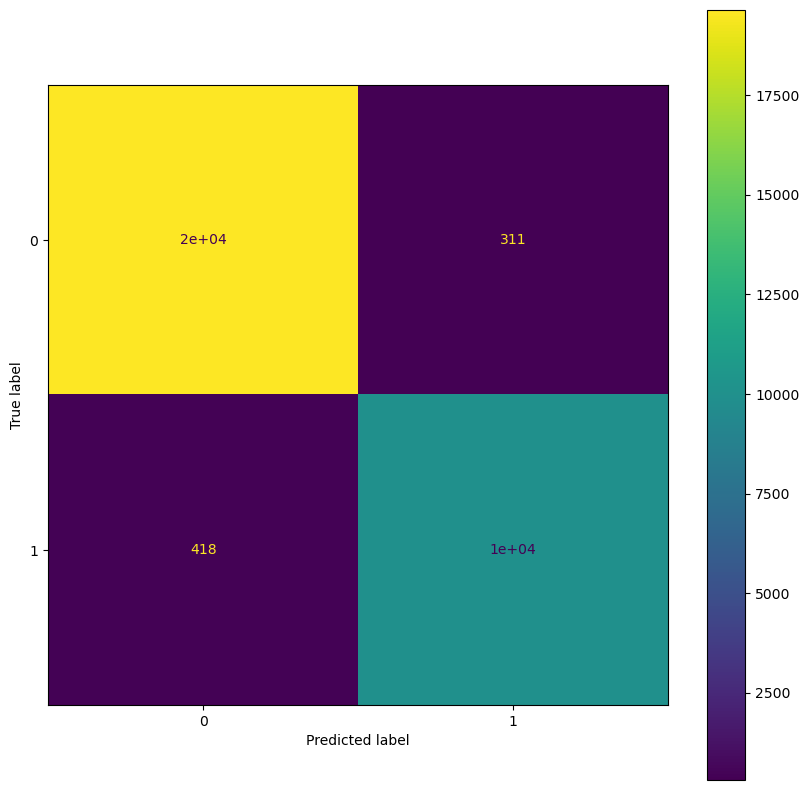

In [176]:
cm = confusion_matrix(test_label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

In [178]:
# Getting features and relevant labels
data = pd.concat([sensor_data.iloc[:, :227],sensor_data[['label:LOC_home', 'label:LYING_DOWN',
                                                                    'label:SITTING', 'label:OR_indoors',
                                                                    'label:PHONE_ON_TABLE', 'label:SLEEPING']]], axis=1)
data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [179]:
# Dropping all null values in the labels
data = data.dropna(subset=['label:LOC_home', 'label:LYING_DOWN','label:SITTING', 'label:OR_indoors',
                                    'label:PHONE_ON_TABLE', 'label:SLEEPING'])
data.head()

,UUID,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_ene

In [180]:

values = {}
for col in data.iloc[:, 1:-6].columns:
    values[col] = data[col].mean()
    
data = data.fillna(value=values)

In [181]:
features = data.iloc[:, 2:-6]
labels = data[['label:LOC_home', 'label:LYING_DOWN','label:SITTING', 'label:OR_indoors','label:PHONE_ON_TABLE', 
              'label:SLEEPING']]

In [182]:
train_set, test_set, train_label, test_label = train_test_split(features, labels, test_size=0.2, random_state=0, stratify=labels)

In [183]:
train_set.shape, train_label.shape

((79733, 225), (79733, 6))

In [184]:
train_label.to_numpy()[0]

array([1., 1., 0., 1., 1., 1.])

In [185]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

# changing datatype from float64 to float32
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')

In [186]:
train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

In [187]:
train_label[0]

array([1., 1., 0., 1., 1., 1.])

In [188]:
model = Sequential([
    Dense(64, activation='elu', input_shape=(train_set.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(32, activation='elu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(train_label.shape[1], activation='sigmoid')]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                14464     
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 6)                 198       
                                                                 
Total params: 17,126
Trainable params: 16,934
Non-trai

In [189]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', 
              metrics=['binary_accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(train_set, 
                    train_label,
                    batch_size=32,
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.1, 
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100
2243/2243 [==============================] - 7s 2ms/step - loss: 0.2602 - binary_accuracy: 0.8929 - val_loss: 0.1890 - val_binary_accuracy: 0.9255 - lr: 0.0010
Epoch 2/100
2243/2243 [==============================] - 5s 2ms/step - loss: 0.1901 - binary_accuracy: 0.9231 - val_loss: 0.1600 - val_binary_accuracy: 0.9379 - lr: 0.0010
Epoch 3/100
2243/2243 [==============================] - 5s 2ms/step - loss: 0.1694 - binary_accuracy: 0.9323 - val_loss: 0.1513 - val_binary_accuracy: 0.9411 - lr: 0.0010
Epoch 4/100
2243/2243 [==============================] - 7s 3ms/step - loss: 0.1565 - binary_accuracy: 0.9380 - val_loss: 0.1387 - val_binary_accuracy: 0.9470 - lr: 0.0010
Epoch 5/100
2243/2243 [==============================] - 7s 3ms/step - loss: 0.1461 - binary_accuracy: 0.9423 - val_loss: 0.1368 - val_binary_accuracy: 0.9466 - lr: 0.0010
Epoch 6/100
2243/2243 [==============================] - 9s 4ms/step - loss: 0.1396 - binary_accuracy: 0.9450 - val_loss: 0.1313 - val_binar

2243/2243 [==============================] - 9s 4ms/step - loss: 0.0896 - binary_accuracy: 0.9655 - val_loss: 0.1032 - val_binary_accuracy: 0.9640 - lr: 0.0010
Epoch 49/100
2243/2243 [==============================] - 8s 4ms/step - loss: 0.0885 - binary_accuracy: 0.9662 - val_loss: 0.1053 - val_binary_accuracy: 0.9638 - lr: 0.0010
Epoch 50/100
2243/2243 [==============================] - 9s 4ms/step - loss: 0.0884 - binary_accuracy: 0.9661 - val_loss: 0.1025 - val_binary_accuracy: 0.9638 - lr: 0.0010
Epoch 51/100
2243/2243 [==============================] - 10s 4ms/step - loss: 0.0887 - binary_accuracy: 0.9661 - val_loss: 0.1028 - val_binary_accuracy: 0.9639 - lr: 0.0010
Epoch 52/100
2243/2243 [==============================] - 9s 4ms/step - loss: 0.0832 - binary_accuracy: 0.9681 - val_loss: 0.0998 - val_binary_accuracy: 0.9657 - lr: 5.0000e-04
Epoch 53/100
2243/2243 [==============================] - 8s 3ms/step - loss: 0.0820 - binary_accuracy: 0.9686 - val_loss: 0.0998 - val_binary_

In [190]:
model.evaluate(test_set, test_label)

623/623 [==============================] - 1s 1ms/step - loss: 0.0942 - binary_accuracy: 0.9663


[0.09420625865459442, 0.9662638902664185]

In [191]:

y_pred = model.predict(test_set)
y_pred = y_pred.round()

623/623 [==============================] - 1s 1ms/step


In [193]:
# from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [194]:
print('Accuracy:', accuracy_score(test_label, y_pred))
print('Recall score:', recall_score(test_label, y_pred, average='weighted'))
print('Precision score:', precision_score(test_label, y_pred, average='weighted'))
print('F1 score:', f1_score(test_label, y_pred, average='weighted'))

Accuracy: 0.8532657770643123
Recall score: 0.9753023848335
Precision score: 0.9698435419989987
F1 score: 0.9725246675196584
